In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Introduction

Why choose this years what do I want to explore etc

## Gather Data

In [2]:
# create data frames from csv files
df_2008 = pd.read_csv('2008.csv')

In [3]:
# create data frames from csv files
df_1998 = pd.read_csv('1998.csv')

In [4]:
# create data frames from csv files
df_2004 = pd.read_csv('2004.csv')

## Assess Data

In [5]:
# inspect data
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
# inspect data
df_1998.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,17,6,715.0,715,840.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1998,1,18,7,715.0,715,830.0,840,WN,76,...,2,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1998,1,19,1,715.0,715,831.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1998,1,20,2,715.0,715,836.0,840,WN,76,...,3,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1998,1,21,3,715.0,715,836.0,840,WN,76,...,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# inspect data
df_2004.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [8]:
# inspect data
df_1998.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384721 entries, 0 to 5384720
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     float64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(13), int64(12), object(4)
memory usage: 1.2+ GB


In [9]:
# inspect data
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(6), int64(18), object(5)
memory usage: 1.5+ GB


In [10]:
# inspect data
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


**Observations**

- 2004 CRSElapsedTime int => float
- 2008 TaxiIn float => int
- 2008 TaxiOut float => int
- 1998 Cancellation Code float => object
- 2004 Carrier Delay int => float
- 2004 Weather Delay int => float
- 2004 NASDelay int => float
- 2004 SecurityDelay int => float
- 2004 LateAircraft Delay int => float

In [12]:
# inspect data
df_1998.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               144509
CRSDepTime                 0
ArrTime               157670
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     157670
CRSElapsedTime          2386
AirTime               157670
ArrDelay              157670
DepDelay              144509
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5384721
Diverted                   0
CarrierDelay         5384721
WeatherDelay         5384721
NASDelay             5384721
SecurityDelay        5384721
LateAircraftDelay    5384721
dtype: int64

In [13]:
# inspect data
df_2004.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               127757
CRSDepTime                 0
ArrTime               141541
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                  127
ActualElapsedTime     141541
CRSElapsedTime             0
AirTime               141541
ArrDelay              141541
DepDelay              127757
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7001506
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [14]:
# inspect data
df_2008.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

# **Observations**

- Delete column Departure Time too many NaN values and variable not needed
- Delete column Arrival Time too many Nan values and variable not needed
- Delete column ActualElapsedTime too many NaN values and variable not needed
- Delete column CRSElapsedTime variable not needed
- Delete column Cancellation Code too many NaN values and variable not needed
- 2008 Fillna Delay columns


In [11]:
# inspect data
df_1998['CancellationCode'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CancellationCode, dtype: float64

## Clean Data

- 2008 TaxiIn float => int
- 2008 TaxiOut float => int
- 2004 Carrier Delay int => float
- 2004 Weather Delay int => float
- 2004 NASDelay int => float
- 2004 SecurityDelay int => float
- 2004 LateAircraft Delay int => float
- Delete column Departure Time too many NaN values and variable not needed
- Delete column Arrival Time too many Nan values and variable not needed
- Delete column ActualElapsedTime too many NaN values and variable not needed
- Delete column CRSElapsedTime variable not needed
- Delete column Cancellation Code too many NaN values and variable not needed
- 2008 Fillna Delay columns

**Define**

**Delete 5 columns from each of the 3 data frames**

**Code**

In [5]:
# drop columns from single data frames
df_1998.drop(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode' ], axis=1, inplace=True)

In [6]:
# drop columns from single data frames
df_2004.drop(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode' ], axis=1, inplace=True)

In [7]:
# drop columns from single data frames
df_2008.drop(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode' ], axis=1, inplace=True)

**Test**

In [34]:
# inspect data
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1955,2225,WN,335,N712SW,116.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,735,1000,WN,3231,N772SW,113.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,620,750,WN,448,N428WN,76.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,930,1100,WN,1746,N612SW,78.0,...,515,3.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1755,1925,WN,3920,N464WN,77.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0


**Define**

**Drop NaN and cast values for specified columns in specified dataframes**

**Code**

In [8]:
# change dtype 2008 TaxiIn step 1
df_2008.dropna(subset = ['TaxiIn'], inplace=True)

In [9]:
# change dtype 2008 TaxiIn step 2
df_2008['TaxiIn'] = df_2008['TaxiIn'].astype(int, inplace=True)

**Test**

In [40]:
# inspect data
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6858079 entries, 0 to 7009727
Data columns (total 24 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              float64
Cancelled            int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(9), int64(11), object(4)
memory usage: 1.3+ GB


**Code**

In [10]:
# change dtype 2008 TaxiOut step1
df_2008.dropna(subset = ['TaxiOut'], inplace=True)

In [11]:
# change dtype 2008 TaxiOut step 2
df_2008['TaxiOut'] = df_2008['TaxiOut'].astype(int, inplace=True)

**Test**

In [12]:
# inspect data
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6858079 entries, 0 to 7009727
Data columns (total 24 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(8), int64(12), object(4)
memory usage: 1.3+ GB


**Code**

In [12]:
# cast values of 2004 delay columns to float
df_2004[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']] = df_2004[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].astype(float, inplace=True)

**Test**

In [48]:
# inspect data
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 24 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(8), int64(12), object(4)
memory usage: 1.3+ GB


**Define**

**Fillna in delay columns in 2008 dataframe**

**Code**

In [13]:
# fillna delay columns with 0
values = {'CarrierDelay': 0, 'WeatherDelay': 0, 'NASDelay' : 0, 'SecurityDelay' : 0, 'LateAircraftDelay' : 0}
df_2008.fillna(value=values, inplace=True)

**Test**

In [50]:
# NaN values in data frame 2008
df_2008.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 5
AirTime              3050
ArrDelay             3050
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [51]:
# NaN values in data frame 2004
df_2004.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
CRSDepTime                0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                 127
AirTime              141541
ArrDelay             141541
DepDelay             127757
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [52]:
# NaN values in data frame 1998
df_1998.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
CRSDepTime                 0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
AirTime               157670
ArrDelay              157670
DepDelay              144509
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay         5384721
WeatherDelay         5384721
NASDelay             5384721
SecurityDelay        5384721
LateAircraftDelay    5384721
dtype: int64

**Define**

**Concatenate Dataframes and drop NaN values except delay columns 1998**

**Code**

In [14]:
# concat cleaned data frames
df_cct = pd.concat([df_1998, df_2004, df_2008], ignore_index=True)

**Test**

In [16]:
# inspect data
df_cct.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,17,6,715,840,WN,76,N520,137.0,...,872,3,5,0,0,NaN,NaN,NaN,NaN,NaN
1,1998,1,18,7,715,840,WN,76,N302,127.0,...,872,2,6,0,0,NaN,NaN,NaN,NaN,NaN
2,1998,1,19,1,715,840,WN,76,N315,128.0,...,872,3,5,0,0,NaN,NaN,NaN,NaN,NaN
3,1998,1,20,2,715,840,WN,76,N372,126.0,...,872,3,12,0,0,NaN,NaN,NaN,NaN,NaN
4,1998,1,21,3,715,840,WN,76,N367,132.0,...,872,3,6,0,0,NaN,NaN,NaN,NaN,NaN


In [17]:
# inspect data
df_cct.tail()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
19372065,2008,12,13,6,959,1150,DL,1636,N646DL,71.0,...,533,6,45,0,0,0.0,0.0,0.0,0.0,0.0
19372066,2008,12,13,6,835,1023,DL,1637,N908DL,139.0,...,874,5,23,0,0,0.0,0.0,0.0,0.0,0.0
19372067,2008,12,13,6,700,856,DL,1638,N671DN,85.0,...,545,24,12,0,0,0.0,0.0,0.0,0.0,0.0
19372068,2008,12,13,6,1240,1437,DL,1639,N646DL,89.0,...,533,13,13,0,0,0.0,0.0,0.0,0.0,0.0
19372069,2008,12,13,6,1103,1418,DL,1641,N908DL,104.0,...,874,8,11,0,0,0.0,0.0,0.0,0.0,0.0


In [15]:
# inspect data
df_cct.shape

(19372070, 24)

**Code**

In [16]:
# dropna except delay columns
df_cct.dropna(subset = ['TailNum', 'AirTime', 'ArrDelay', 'DepDelay'], inplace=True)

**Test**

In [20]:
# inspect data
df_cct.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
CRSDepTime                 0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay         5227051
WeatherDelay         5227051
NASDelay             5227051
SecurityDelay        5227051
LateAircraftDelay    5227051
dtype: int64

## EDA

**Questions**

- 1)  How did arrival delay change over the years?
- 2)  How did departure delay change over the years?
- 3)  How did early arrivals change over the years?
- 4)  Weekdays with biggest delays? In general - difference over years
- 5)  Time of day with biggest delay? In general - difference over years
- 6)  Airport of origin with biggest delays? In general - difference over years
- 7)  Destination airport with biggest delays? In general - difference over years
- 8)  Is distance associated with delays? In general - difference over years
- 9)  Average cancellations per year?
- 10) Which carrier has biggest delays? In general - difference over years
- 11) Month with biggest delays? In general - difference over years
- 12) Airtime versus distance
- 13) Differences in reasons for delays between 2004 and 2008

### 1) How did arrival delay change over the years

In [17]:
# descriptive statistics of data 
df_cct['ArrDelay'].describe()

count    1.906980e+07
mean     7.400637e+00
std      3.478037e+01
min     -1.302000e+03
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.100000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

**Discussion**

**Data spread out over a wide range. An early arrival of more than 20 hours seems unlikely. Also a delay of 40 hours does not fell like a "normal" delay but more like a cancellation. Let's see if we will skip these outliers.**

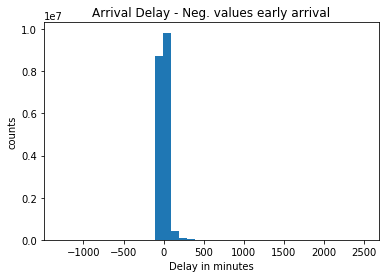

In [26]:
# draw histogram of data
bin_edges = np.arange(df_cct['ArrDelay'].min(), df_cct['ArrDelay'].max()+ 100 , 100)
plt.hist(data=df_cct, x='ArrDelay', bins=bin_edges);
plt.xlabel('Delay in minutes')
plt.ylabel('counts')
plt.title('Arrival Delay - Neg. values early arrival');

**Discussion**

**To visualize all the data log y axis as there is an enormous span within the bins between just a few and million datapoints**

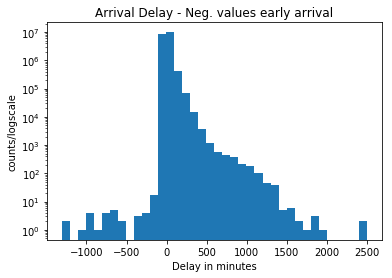

In [25]:
# log scale y axis to get better visualization of data
bin_edges = np.arange(df_cct['ArrDelay'].min(), df_cct['ArrDelay'].max()+ 100 , 100)
plt.hist(data=df_cct, x='ArrDelay', bins=bin_edges);
plt.xlabel('Delay in minutes')
plt.ylabel('counts/logscale')
plt.yscale('log')
plt.title('Arrival Delay - Neg. values early arrival');

**Discussion**

**As there are negative values in the arrival delay series I cannot use a log transform. Furthermore a question is if an early arrival of more than a few minutes is possible because an early arrival of more than one hour would imply an early start of the plane (depending on the flight distance) which for a commercial carrier is not possible. I will also check delays as a delay of more than 12 hours could be a new flight already. I will also check for the distribution of delays among years and carriers to see whether these outliers are attributable to time or carrier.**

In [33]:
# is it possible to have an early arrival of > 20 hours (> 1300 minutes) according to flight time 
df_cct[df_cct['ArrDelay'] < -1300]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
12068842,2004,12,30,4,1922,2103,NW,1475,N610NW,131.0,...,926,13,20,0,0,0.0,0.0,0.0,0.0,0.0


**Discussion**

**For a distance of 926 miles a n early arrival of more than 20 hours is impossible. This is clearly incorrect and this data point should not be used in the analysis. What about data points of < -100 min.**  

In [40]:
# avg air time for early arrival > 45 min
df_cct[df_cct['ArrDelay'] < -100]['AirTime'].mean()

99.37209302325581

In [41]:
# avg early arrival for early arrival > 45 min
df_cct[df_cct['ArrDelay'] < -100]['ArrDelay'].mean()

-461.90697674418607

**Discussion**

**I do not think that an early arrival of 461 minutes is possible with an average air time of 99 minutes. Therefore inspect data visually.**

In [39]:
# inspect data for early arrival > 45 min
df_cct[df_cct['ArrDelay'] < -100]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2303384,1998,6,18,4,2100,2136,TW,391,N985Z,114.0,...,483,8,13,0,0,NaN,NaN,NaN,NaN,NaN
3465068,1998,8,11,2,1530,1840,DL,35,N1201P,293.0,...,2475,783,30,0,0,NaN,NaN,NaN,NaN,NaN
4603625,1998,11,26,4,1710,1921,TW,119,N607TW,100.0,...,1593,5,11,0,0,NaN,NaN,NaN,NaN,NaN
5591607,2004,1,3,6,615,750,OO,3618,N217SW,189.0,...,320,10,6,0,0,0.0,0.0,0.0,0.0,0.0
5608313,2004,1,17,6,515,656,OO,3730,N411SW,172.0,...,460,9,12,0,0,0.0,0.0,0.0,0.0,0.0
5623585,2004,1,30,5,1115,1215,OO,3621,0,1936.0,...,175,0,11,0,0,0.0,0.0,0.0,0.0,0.0
5730952,2004,1,26,1,133,444,EV,4632,N878AS,-1343.0,...,381,1444,24,0,0,0.0,0.0,0.0,0.0,0.0
6178712,2004,2,14,6,1120,1250,OO,6405,N958SW,-706.0,...,451,0,706,0,0,0.0,0.0,0.0,0.0,0.0
6884855,2004,3,8,1,1545,1740,EV,4855,N720EV,68.0,...,1456,4,28,0,0,0.0,0.0,0.0,0.0,0.0
7083963,2004,3,3,3,735,945,DH,6120,N419FJ,20.0,...,230,7,10,0,0,0.0,0.0,0.0,0.0,0.0


**Discussion**

**AirTime is a variable with impossible negative values. Therefore this variable is not usefull for further exploration. I will go back to cleaning section and delete this variable. Distance seems to be the useful variable for the analysis. Inspect the usefull intervalls of the arrival delay data with a box plot of the year variable.**

In [42]:
# what about delays > 20 hours 
df_cct[df_cct['ArrDelay'] > 1300]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
518153,1998,2,4,3,836,1212,AA,1151,N868AA,123.0,...,1189,8,14,0,0,NaN,NaN,NaN,NaN,NaN
1127915,1998,3,21,6,1545,1940,NW,1717,N133JC,230.0,...,1929,5,20,0,0,NaN,NaN,NaN,NaN,NaN
1479584,1998,4,24,5,1425,1727,NW,568,N532US,86.0,...,680,6,11,0,0,NaN,NaN,NaN,NaN,NaN
2927600,1998,7,19,7,1500,1955,NW,1215,N325US,246.0,...,1929,10,17,0,0,NaN,NaN,NaN,NaN,NaN
3376442,1998,8,15,6,726,837,AA,1603,N2CCAA,99.0,...,733,5,7,0,0,NaN,NaN,NaN,NaN,NaN
3842637,1998,9,1,2,0,0,AA,1080,N426AA,46.0,...,235,4,14,0,0,NaN,NaN,NaN,NaN,NaN
4291628,1998,10,9,5,905,1114,NW,1004,N712RC,41.0,...,231,19,17,0,0,NaN,NaN,NaN,NaN,NaN
5132288,1998,12,22,2,927,1528,AA,1956,N572AA,190.0,...,1739,10,13,0,0,NaN,NaN,NaN,NaN,NaN
5137382,1998,12,26,6,831,1236,AA,764,N279AA,136.0,...,1249,10,53,0,0,NaN,NaN,NaN,NaN,NaN
5536331,2004,1,5,1,1420,2149,NW,924,N239NW,298.0,...,2677,7,21,0,0,1879.0,0.0,0.0,0.0,0.0


In [53]:
# what about delays > 30 hours 
df_cct[df_cct['ArrDelay'] > 2000]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13497533,2008,2,3,7,1820,555,NW,808,N817NW,437.0,...,3972,6,16,0,0,1455.0,0.0,4.0,0.0,1002.0
14684734,2008,4,10,4,1417,1605,NW,1699,N3324L,132.0,...,930,8,14,0,0,2436.0,0.0,0.0,0.0,17.0


In [52]:
df_cct.loc[12342157, :]

Year                   2004
Month                    12
DayofMonth               19
DayOfWeek                 7
CRSDepTime             1830
CRSArrTime              602
UniqueCarrier            NW
FlightNum                98
TailNum              N230NW
AirTime                 458
ArrDelay               1864
DepDelay               1817
Origin                  HNL
Dest                    MSP
Distance               3972
TaxiIn                   17
TaxiOut                  24
Cancelled                 0
Diverted                  0
CarrierDelay            695
WeatherDelay              0
NASDelay                 47
SecurityDelay             0
LateAircraftDelay      1122
Name: 12342157, dtype: object

**Discussion**

**As I cannot rule out at this timepoint that these delays are accurate numbers and as most of the extreme delays are associated with specific airlines I will keep these data for further analysis. There is no cancellation associated with an extreme delay. Therefore I will check the Cancelled variable for it's values.**

In [44]:
# check cancelled series for values
df_cct['Cancelled'].unique()

array([0])

**Discussion**

**Cancelled variable can be deleted as it does not convey any information. Next check box plot of Arrival delay depending on year.**

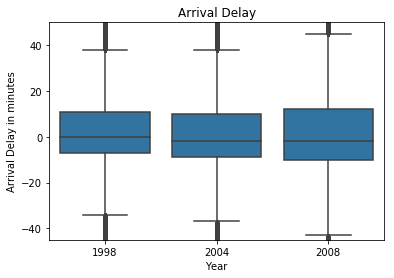

In [30]:
# draw boxplot of data
base_col = sns.color_palette()[0]
sns.boxplot(data=df_cct,x='Year', y='ArrDelay', color=base_col)
plt.ylim(-45, 50)
plt.ylabel('Arrival Delay in minutes')
plt.title('Arrival Delay');

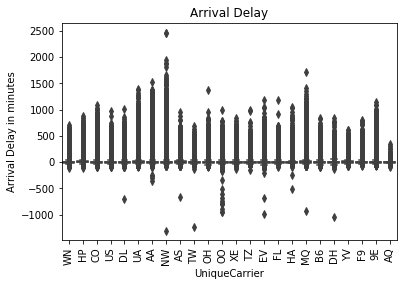

In [48]:
# draw boxplot of data
base_col = sns.color_palette()[0]
sns.boxplot(data=df_cct,x='UniqueCarrier', y='ArrDelay', color=base_col)
#plt.ylim(-100, 200)
plt.ylabel('Arrival Delay in minutes')
plt.xticks(rotation=90)
#plt.ylim(-60, 60)
plt.title('Arrival Delay');